\chapter{Diseño experimental}

In [1]:
%matplotlib inline

%run -i ../code/multirover4.py
import pandas as pd
pd.set_option('display.precision',6)


dia1 = "010"
dian = "013"
ano = "2017"

Observable = "C1"
# Variables de la grafica
error_max = 100

# Ubicacion de la Rinex local DB 
Rinex_dataBase      = "../../new_data"
Simu_Folder         = getcwd() +"/" + "Temp_Simul_data"

# agregando nuevos pares de estaciones (que no estan en el kmz)
#parejas_kmz        = get_data_stations("./Coconet_sites_2016.kmz", 1e3)
#parejas_kmz        = get_data_stations("./UNAVCO_perm.kmz", 300) # 110
parejas_kmz = {}

#parejas_kmz[0] = ("OLVN", "AIRS", "NWBL",)
#parejas_kmz[5] = ('BELE', 'BEPA',)


parejas_kmz[1] = ("BARA", "TGDR", "JME2",)
parejas_kmz[2] = ("ljrn", "p553", "p554", "fzhs",)
parejas_kmz[3] = ("CN20", "TGPM",)
parejas_kmz[4] = ('TGMX', 'UNPM',)

info = {}
info[0] = "Monserrat (Antillas Caribeñas)"
info[1] = "Rep. Dominicana"
info[2] = "USA"
info[3] = "Panáma"
info[4] = "México"

RinexDB = descarga_Rinex_Compri(Rinex_dataBase, parejas_kmz, dia1, dian, ano)
## Leer los rinex almacenado en mi equipo
RinexDB = read_Rinex_Compri(Rinex_dataBase, parejas_kmz)

#pareja = parejas_kmz[3]
resolucion = 1000
tsample_sample = 15

axis_labels = ["gps_sow ["+str(resolucion*tsample_sample)+" s]", "error [m]", "stdlone_err vs coop_err"]


ion_mas= [None, "dual_freq", "dual_freq", "klobu", "dual_freq", "wallas", "dual_freq", "taylor"]
ion_rov= [None,  None,       "klobu",     "klobu",  "wallas",   "wallas", "taylor" ,   "taylor"]

distances=[0., 5, 10]

N_shemes_start = 0
N_shemes_end   = 7
show_plots_nb = True   # For development
show_plots_doc = True # For generate reports


 Descargando Nuevos Archivos ....
************************

	 [Estacion] 	 [dia GPS] 		 [RESULTADO]
	 bara
			 010 		 Archivos ya disponibles!!!
			 011 		 Archivos ya disponibles!!!
			 012 		 Archivos ya disponibles!!!
			 013 		 Archivos ya disponibles!!!
	 tgdr
			 010 		 Archivos ya disponibles!!!
			 011 		 Archivos ya disponibles!!!
			 012 		 Archivos ya disponibles!!!
			 013 		 Archivos ya disponibles!!!
	 jme2
			 010 		 Archivos ya disponibles!!!
			 011 		 Archivos ya disponibles!!!
			 012 		 Archivos ya disponibles!!!
			 013 		 Archivos ya disponibles!!!
	 ljrn
			 010 		 Archivos ya disponibles!!!
			 011 		 Archivos ya disponibles!!!
			 012 		 Archivos ya disponibles!!!
			 013 		 Archivos ya disponibles!!!
	 p553
			 010 		 Archivos ya disponibles!!!
			 011 		 Archivos ya disponibles!!!
			 012 		 Archivos ya disponibles!!!
			 013 		 Archivos ya disponibles!!!
	 p554
			 010 		 Archivos ya disponibles!!!
			 011 		 Archivos ya disponibles!!!
			 012 		 Archivos y

In [2]:
#RinexDB

Los conjuntos de estaciones empleados para evaluar cada uno de los escenarios anteriores será:

In [3]:

df_stations = pd.DataFrame(parejas_kmz.items(), index=parejas_kmz.keys(), columns=["Group", "Receivers"])
df_stations = df_stations.set_index("Group")
df_stations = df_stations.assign(Size_group = df_stations['Receivers'].apply(lambda x: len(x)))
df_stations = df_stations.assign(Location = [info[k] for k in parejas_kmz.keys()]) #Antillas"
#display(df_stations)

Tabla = df_stations.to_latex().encode('ascii','ignore')
label = "tabla_escenarios"
caption = "Estaciones utilizadas para el estudio."

Table_latex(table=Tabla, ref=label, cap=caption)

<__main__.Table_latex instance at 0x7f38b021bd40>

En la siguiente figura se puede apreciar una visión geográfica de donde se encuentran las agrupaciones utilizadas.

Saving figure to './Red_Analisis.pdf'... Done


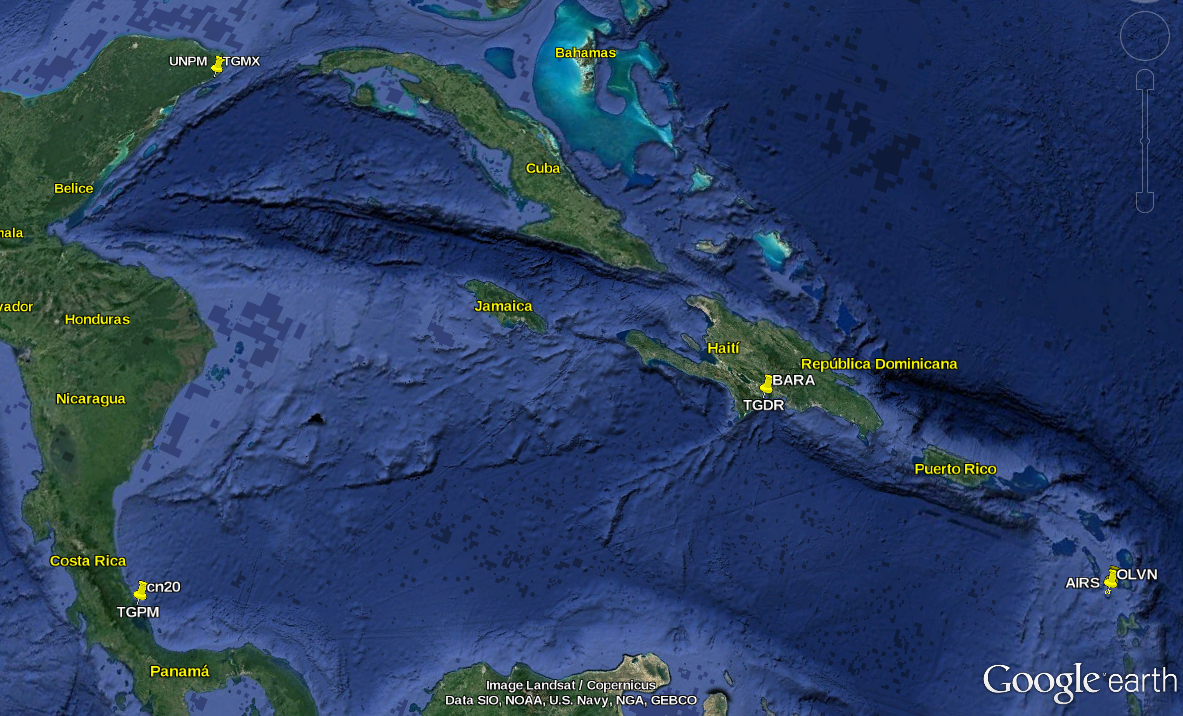

<__main__.Caption instance at 0x7f387f35b638>

In [4]:
from IPython.display import Image
#Image(filename="../Documento/images/Red_Analisis.png")
#display(Image(filename))

filename = "../Documento/images/Red_Analisis.png"
pdf_name = "Red_Analisis"
figlabel = pdf_name
figcaption = "Ubicación de las estaciones empleadas para el estudio."

import matplotlib.image as mpimg
img = mpimg.imread(filename)
plt.imshow(img, extent=[0,100,0,1], aspect='auto')
save(pdf_name, ext="pdf", close=True, verbose=True)
display(Image(filename),Caption(pdf_name, figlabel, str(figcaption), size=(1.05, 0.35)))

In [ ]:
%cat ../../0_Diseno_experimental.txt

## Desarrollo de los experimentos

In [5]:
%run -i ../code/multirover4.py


import pandas as pd
pd.set_option('display.precision',6)

#backup = pd.HDFStore('Analisis_weight_010.h5')
#csv_content = backup['Resul_final']
#Resul_final = csv_content.iloc[0].to_dict()


scenarios = [["%s.%s" %(item, subitem) for subitem in range(1, len(distances)+1)] for item in range(1, 9)]
Ionos_master = [["%s" %(item) for subitem in range(1, len(distances)+1)] for item in ion_mas]
Ionos_rover  = [["%s" %(item) for subitem in range(1, len(distances)+1)] for item in ion_rov]

scenary = scenarios[N_shemes_start:N_shemes_end+1]
Ionos_m = Ionos_master[N_shemes_start:N_shemes_end+1]
Ionos_r = Ionos_rover[N_shemes_start:N_shemes_end+1]

df_res=pd.DataFrame()


for schemes, ionos_m, ionos_r in zip(scenary, Ionos_m, Ionos_r):
    #print (schemes)
    tit = []
    Resul_final, Scheme_tags = [], []
    
    for d, scheme, ion_master, ion_rover in zip(distances, schemes, ionos_m, ionos_r):
        #print " \t ", scheme, ion_mas, ion_rov, d
        
        # incrustar titulo de seccion\n"
        display(Latex(section_title(0, scenario=scheme).encode("utf-8")))

        print ("*"*35)
        print ("Start simulation for scheme ", scheme)
        print ("*"*35)
        
        R11, _ = simulation_multirover(Observable, error_max, parejas_kmz, RinexDB, dia1, dian, ano,
                               distances = d,
                               Simu_Folder=None,
                               res_plot=resolucion,
                               iono_model_master= ion_master,
                               iono_model_rover = ion_rover,
                               silent_exec=True)
        
        tit.append(scheme)
        df_res = gen_df_results3(df_res, R11, scheme)
        df13 = df_res[df_res['scenario'].isin(tit)]
        df13 = create_multi(df13,
                            index=['gps_day', 'stations', 'scenario'],
                            cols=["index_gen", "improve_by_station"])
        #display(df13)
        
        Tabla = df13.to_latex().encode('ascii','ignore')
        label = "tabla_"+scheme
        caption = "\'Indice de mejora para escenario %s"%(scheme)

        display(Table_latex(table=Tabla, ref=label, cap=caption))
        # incrustar titulo de seccion\n",
        display(Latex(section_title(1, scenario=scheme).encode("utf-8")))
        
        #"""
        plot_from_dict(R11, axis_labels=axis_labels, scenario=scheme, 
                       plot_inline=show_plots_nb,
                       plot_in_doc=False)
        
        plotting_df3(df_res, scheme,
            title="Improvement index: ",
            xlabel="gps_sow", #  ["+str(resolucion)+\"x30s]",
            ylabel="err_stdlone - err_coop [m]",
            plot_inline=show_plots_nb,
            plot_in_doc=show_plots_doc)
        #"""
        Resul_final.append(R11)
        Scheme_tags.append(scheme)
    
    csv_content = pd.DataFrame([Resul_final], columns=Scheme_tags)
    
    backup = pd.HDFStore('Analisis_weight_010'+str(tit)+'.h5')
    backup['Resul_final'] = csv_content
    backup['df_res'] = df_res
    backup.close()

<IPython.core.display.Latex object>

***********************************
('Start simulation for scheme ', '1.1')
***********************************
[GPS day]   [year]	[Station Pair]		[Process status]

 010	2017 	   ('BARA', 'TGDR', 'JME2')	 Running... 

KeyError: 'svTimeCtes'

In [ ]:
tit = r"""\subsection{Resumen de los resultados para los escenarios}"""

display(Latex(section_title(tit, scenario="").encode("utf-8")))

df_fin = df_res.set_index("scenario").T
    
Tabla = df_fin.to_latex().encode('ascii','ignore')
label = "tabla_resumen_escenarios"
caption = "Resultados para todos los escenarios."
#Table_latex(Tabla, label, caption, landscape=True)

In [ ]:
# GUARDANDO TODOS LOS DICCIONARIOS PARA EXPORTAR A EXCEL O ALGO

# How to pickle or store Jupyter (IPython) notebook session for later
# https://goo.gl/ijgv2H
# conda install pytables

"""
import pandas as pd

csv_content = pd.DataFrame([Resul_final], columns=Scheme_tags)
#csv_content
backup = pd.HDFStore('Analisis_weight_010.h5')
backup['Resul_final'] = csv_content
backup['df_res'] = df_res
backup.close()
"""